In [131]:
from uncertainties import unumpy
from uncertainties import ufloat
from scipy import odr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [132]:
print('Reading file...')
df = pd.read_excel("data.xlsx")
print('File read successfully\n\n')

Reading file...
File read successfully




In [133]:
dist = np.array(df['d'])
def_y_down = np.array(df['y_down'])
volt_y_down = np.array(df['V_down'])

def_y_up = np.array(df['y_up'])
volt_y_up = np.array(df['V_up'])

theta_down = np.array(df['theta_down'])
theta_up = np.array(df['theta_up'])

In [134]:
errDist = 0.1 #cm
errVolt = 0.1 #V
errDeg = 0.1 #deg

initialPos = ufloat(0.3, errDist) #initla posiition of dot at 0 voltage

In [135]:
dist = unumpy.uarray(dist, errDist)
def_y_down = np.abs(unumpy.uarray(def_y_down, errDist)) - initialPos
volt_y_down = unumpy.uarray(volt_y_down, errVolt)

def_y_up = np.abs(unumpy.uarray(def_y_up, errDist)) - initialPos
volt_y_up = unumpy.uarray(volt_y_up, errVolt)

theta_down = unumpy.radians( unumpy.uarray(theta_down, errDeg))
theta_up = unumpy.radians(unumpy.uarray(theta_up, errDeg))

V_up = def_y_up*volt_y_up
V_down = def_y_down*volt_y_down

print(V_down)



[2.08+/-1.4709180806557516 0.9300000000000004+/-1.3152566289511718
 0.0+/-1.0889444430272832 -0.6999999999999998+/-0.9900000000000001
 -1.18+/-0.8346256645946134 -1.3499999999999999+/-0.637102817447859]


In [136]:
tan2_down = unumpy.tan(theta_down)**2
tan2_up = unumpy.tan(theta_up)**2

In [137]:
upData = odr.RealData(unumpy.nominal_values(tan2_up), unumpy.nominal_values(V_up), sx=unumpy.std_devs(tan2_up), sy=unumpy.std_devs(V_up))
downData = odr.RealData(unumpy.nominal_values(tan2_down), unumpy.nominal_values(V_down), sx=unumpy.std_devs(tan2_down), sy=unumpy.std_devs(V_down))

ordUp = odr.ODR(upData, odr.unilinear)
odrDown = odr.ODR(downData, odr.unilinear)

output_up, output_down = ordUp.run(), odrDown.run()

slopeUp, interceptUp = output_up.beta
slopUpErr, interceptUpErr = output_up.sd_beta

slopeDown, interceptDown = output_down.beta
slopeDownErr, interceptDownErr = output_down.sd_beta

print(slopeUp)
print(slopeDown)


-6.0419973014090935
2.0486158182122685


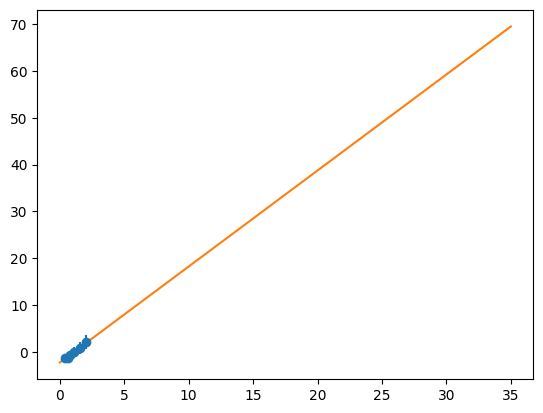

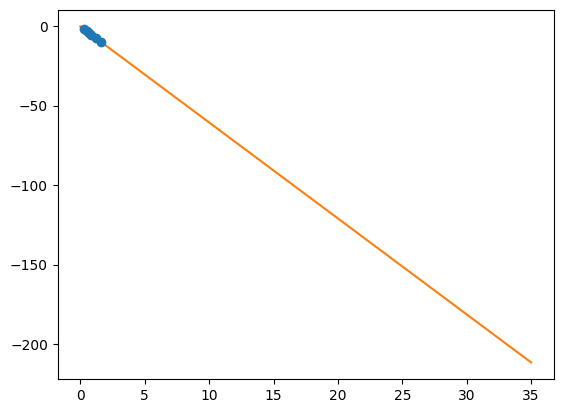

In [138]:
#ploting V vs tan^2(theta) and the fit
plt.errorbar(unumpy.nominal_values(tan2_down), unumpy.nominal_values(V_down), xerr=unumpy.std_devs(tan2_down), yerr=unumpy.std_devs(V_down), fmt='o', label='Down')
plt.plot(np.linspace(0, 35, 100), slopeDown*np.linspace(0, 35, 100) + interceptDown, label='Fit Down')
plt.show()


plt.errorbar(unumpy.nominal_values(tan2_up), unumpy.nominal_values(V_up), xerr=unumpy.std_devs(tan2_up), yerr=unumpy.std_devs(V_up), fmt='o', label='Up')
plt.plot(np.linspace(0, 35, 100), slopeUp*np.linspace(0, 35, 100) + interceptUp, label='Fit Up')
plt.show()

In [139]:
e_by_m1 = ufloat(slopeUp, slopUpErr) / (3.81e-5 * 3.81e-5 * 106.7e-6)
e_by_m2 = ufloat(slopeDown, slopeDownErr) / (3.81e-5 * 3.81e-5 * 106.7e-6)

print(e_by_m1)
print(e_by_m2)

(-3.90+/-0.13)e+13
(1.32+/-0.09)e+13
